**Problem Statement:**

The goal of this project is to develop a predictive model that can accurately predict whether an individual has diabetes based on a variety of health-related attributes.Tthe model aims to identify individuals at risk for diabetes. The model will be evaluated on its ability to correctly classify individuals as either diabetic or non-diabetic, with the intention of aiding early diagnosis and helping healthcare professionals take preventive measures.

### Key Objectives:
- To predict whether an individual has diabetes based on clinical and personal health data.
- To identify key risk factors that contribute to the likelihood of having diabetes.
- To create a model that is both accurate and interpretable for clinical use.

Objective: Build a classification model to predict the likelihood of a person having diabetes.

About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Purpose: Importing essential libraries for data manipulation (Pandas), numerical computations (NumPy), data visualization (Matplotlib and Seaborn).

In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv.zip')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Purpose: Load the diabetes prediction dataset into a Pandas DataFrame for analysis and display the first few rows.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
df['gender'] = labelencoder.fit_transform(df['gender'])
df['smoking_history'] = labelencoder.fit_transform(df['smoking_history'])

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


Purpose: Convert categorical variables (gender and smoking_history) into numeric format using LabelEncoder.

In [ ]:
# Import necessary libraries
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler,NearMiss

# Assuming 'df' is your DataFrame with 'target_column' as the target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Create an undersampler object
rus = NearMiss()

# Apply the undersampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.concat([X_resampled, y_resampled], axis=1)


Purpose: Address class imbalance using the NearMiss algorithm, which undersamples the majority class to balance the target variable.

<Axes: xlabel='diabetes', ylabel='count'>

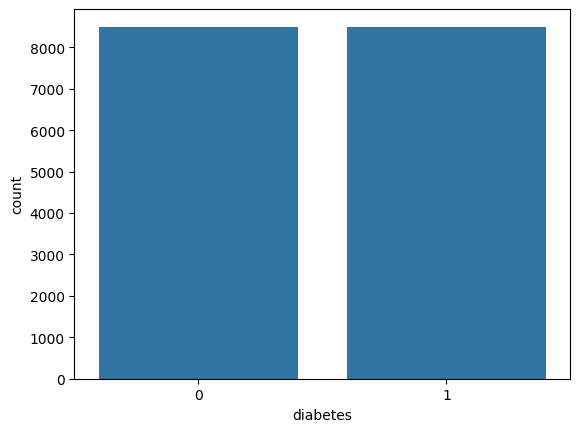

In [ ]:
sns.countplot(x='diabetes', data=df)

Purpose: Create a count plot to visualize the distribution of the target variable (diabetes) and confirm the balance.

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Purpose: Identify missing values in the dataset.

In [ ]:
df.duplicated().sum()

767

Purpose: Check for duplicate rows in the dataset and confirm data integrity.

In [ ]:
df.drop_duplicates(inplace=True)

Purpose:To remove duplicates

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,16233.000000,16233.000000,16233.000000,16233.000000,16233.000000,16233.000000,16233.000000,16233.000000,16233.000000
mean,0.451673,61.302778,0.172242,0.101460,2.700548,30.111236,6.511224,173.879813,0.522516
std,0.497674,14.084889,0.377602,0.301946,1.718076,6.138688,0.948927,49.260805,0.499508
min,0.000000,3.000000,0.000000,0.000000,0.000000,10.980000,4.500000,126.000000,0.000000
25%,0.000000,52.000000,0.000000,0.000000,1.000000,27.320000,6.000000,140.000000,0.000000
50%,0.000000,62.000000,0.000000,0.000000,3.000000,27.320000,6.200000,159.000000,1.000000
75%,1.000000,73.000000,0.000000,0.000000,4.000000,32.230000,6.600000,200.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,5.000000,88.720000,9.000000,300.000000,1.000000


Purpose: Generate summary statistics for numerical columns, including mean, standard deviation, min, and max values.

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'smoking_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

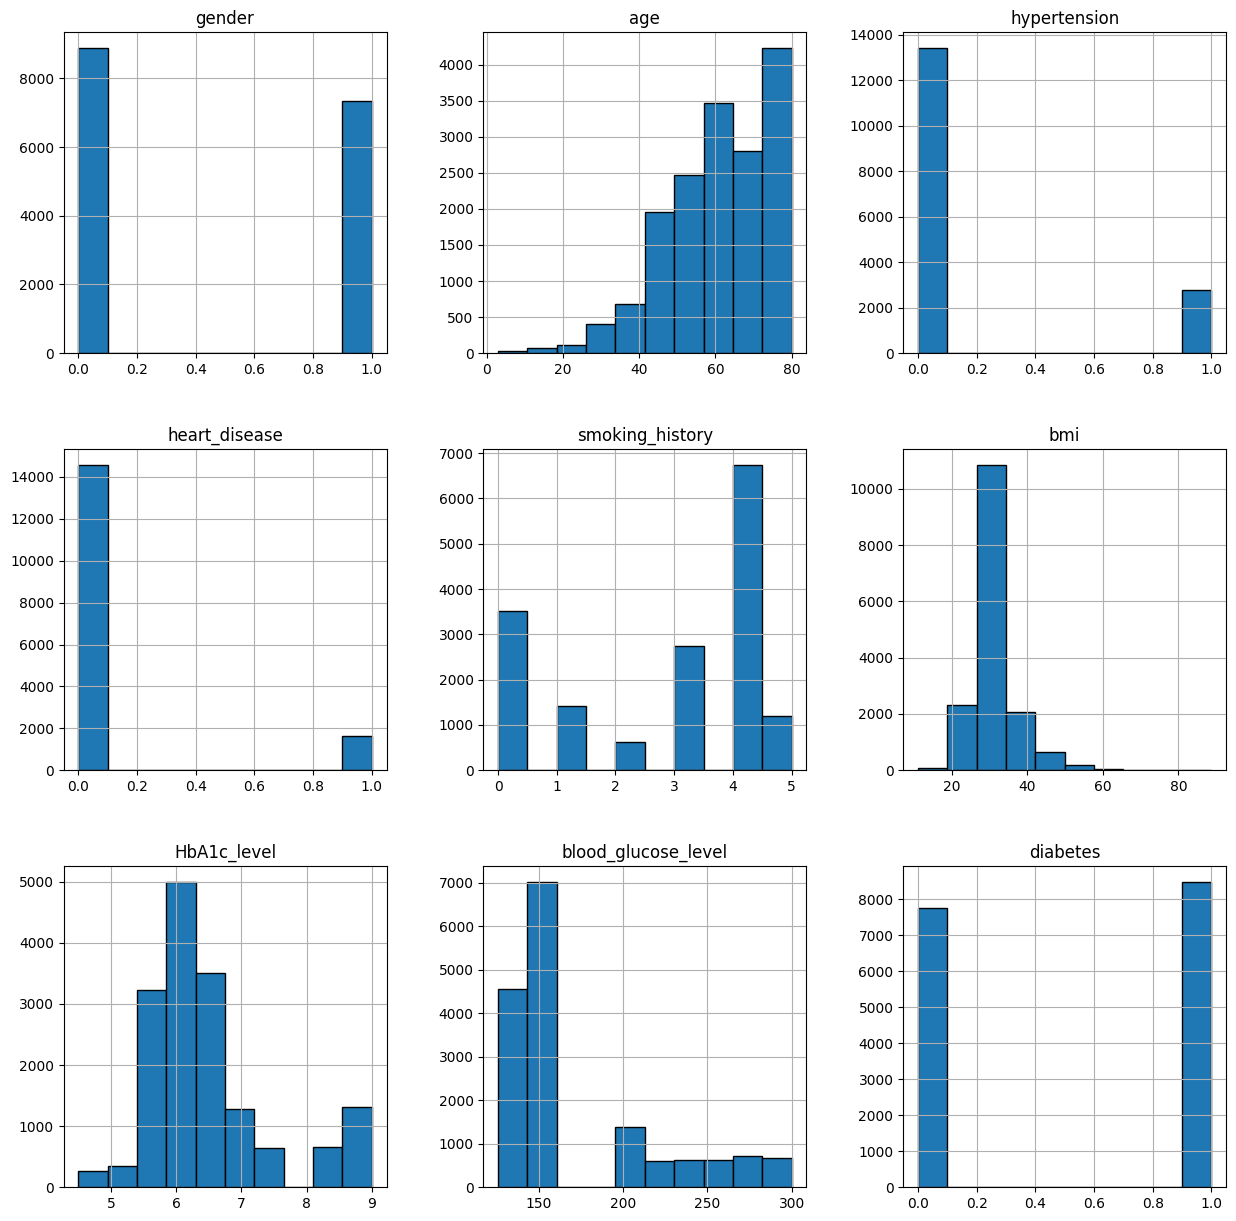

In [ ]:
df.hist(edgecolor='black',figsize=(15,15))

Purpose: Plot histograms for all numerical features to analyze their distributions.

In [ ]:
df.shape

(16233, 9)

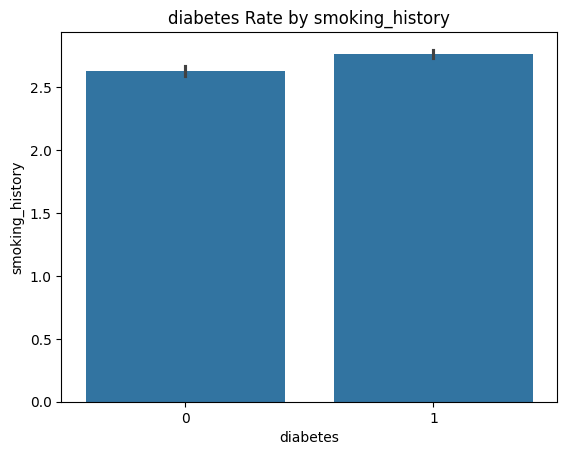

In [ ]:
sns.barplot(x='diabetes', y='smoking_history', data=df)
plt.title('diabetes Rate by smoking_history')
plt.show()

Purpose: Create a bar plot to evaluate the relationship between smoking_history and diabetes prevalence.

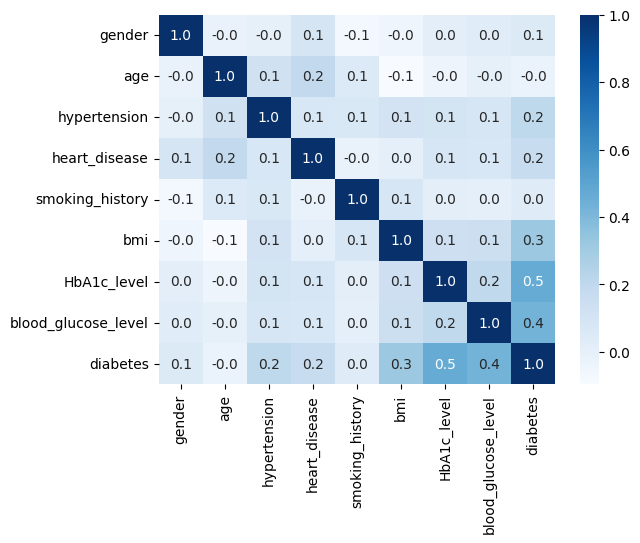

In [ ]:
corr_matrix=df.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',robust=True,cmap='Blues')
plt.show()

Purpose: Generate a heatmap to visualize correlations between features and identify highly correlated predictors for diabetes.


In [ ]:
corr_matrix

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.017894,-0.001271,0.090233,-0.073522,-0.042328,0.018068,0.029286,0.050534
age,-0.017894,1.000000,0.120392,0.190451,0.054096,-0.132448,-0.037152,-0.002071,-0.027987
hypertension,-0.001271,0.120392,1.000000,0.076359,0.067828,0.104661,0.103817,0.082638,0.204156
heart_disease,0.090233,0.190451,0.076359,1.000000,-0.017671,0.006443,0.082869,0.076658,0.166007
smoking_history,-0.073522,0.054096,0.067828,-0.017671,1.000000,0.082551,0.015730,0.007153,0.039766
bmi,-0.042328,-0.132448,0.104661,0.006443,0.082551,1.000000,0.142194,0.144244,0.321491
HbA1c_level,0.018068,-0.037152,0.103817,0.082869,0.015730,0.142194,1.000000,0.195367,0.466992
blood_glucose_level,0.029286,-0.002071,0.082638,0.076658,0.007153,0.144244,0.195367,1.000000,0.427837
diabetes,0.050534,-0.027987,0.204156,0.166007,0.039766,0.321491,0.466992,0.427837,1.000000


In [ ]:
sor = df.corr()['diabetes']
sor = sor.sort_values(ascending=False)
sor

,diabetes
diabetes,1.000000
HbA1c_level,0.466992
blood_glucose_level,0.427837
bmi,0.321491
hypertension,0.204156
heart_disease,0.166007
gender,0.050534
smoking_history,0.039766
age,-0.027987


In [ ]:
df.drop(['smoking_history', 'gender', 'age'], axis=1, inplace=True)

Purpose: Remove features with weak correlation to the target variable (diabetes) to improve model efficiency.


In [ ]:
df

,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,0,27.32,6.6,160,0
2,0,0,27.32,6.5,160,0
5,0,0,27.32,6.6,130,0
6,0,0,27.32,5.8,130,0
8,0,0,27.26,6.1,130,0
...,...,...,...,...,...,...
16995,1,1,33.55,8.2,140,1
16996,0,1,30.42,6.2,300,1
16997,0,0,34.45,6.5,280,1
16998,1,0,38.31,7.0,200,1


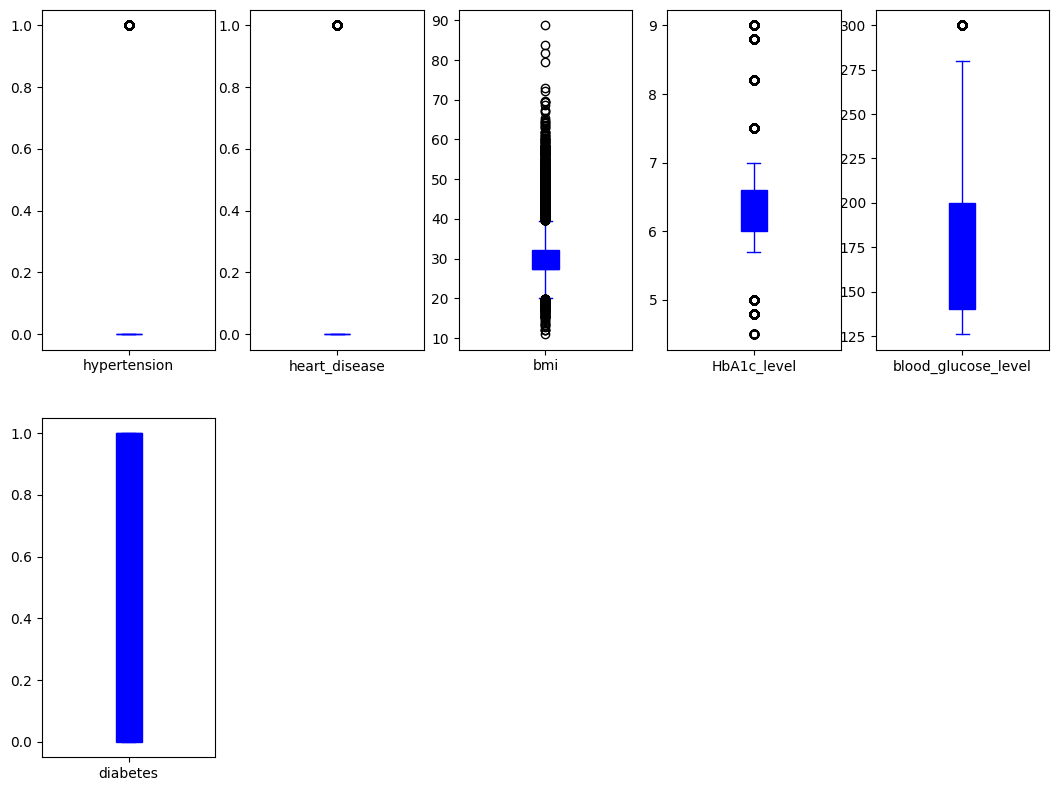

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

Purpose: Create box plots for all features to visually identify outliers.

       hypertension  heart_disease       bmi  HbA1c_level  blood_glucose_level
0          0.000000       0.000000  3.343568     2.028148             5.081404
2          0.000000       0.000000  3.343568     2.014903             5.081404
5          0.000000       0.000000  3.343568     2.028148             4.875197
6          0.000000       0.000000  3.343568     1.916923             4.875197
8          0.000000       0.000000  3.341447     1.960095             4.875197
...             ...            ...       ...          ...                  ...
16995      0.693147       0.693147  3.542408     2.219203             4.948760
16996      0.000000       0.693147  3.447445     1.974081             5.707110
16997      0.000000       0.000000  3.568123     2.014903             5.638355
16998      0.693147       0.000000  3.671479     2.079442             5.303305
16999      0.000000       0.000000  3.437529     1.974081             5.484797

[16233 rows x 5 columns]


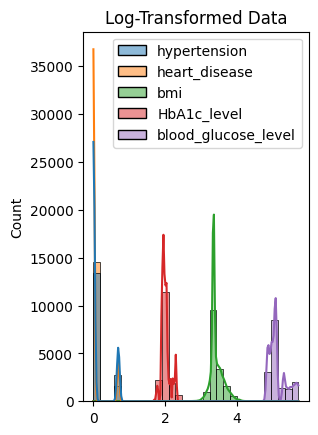

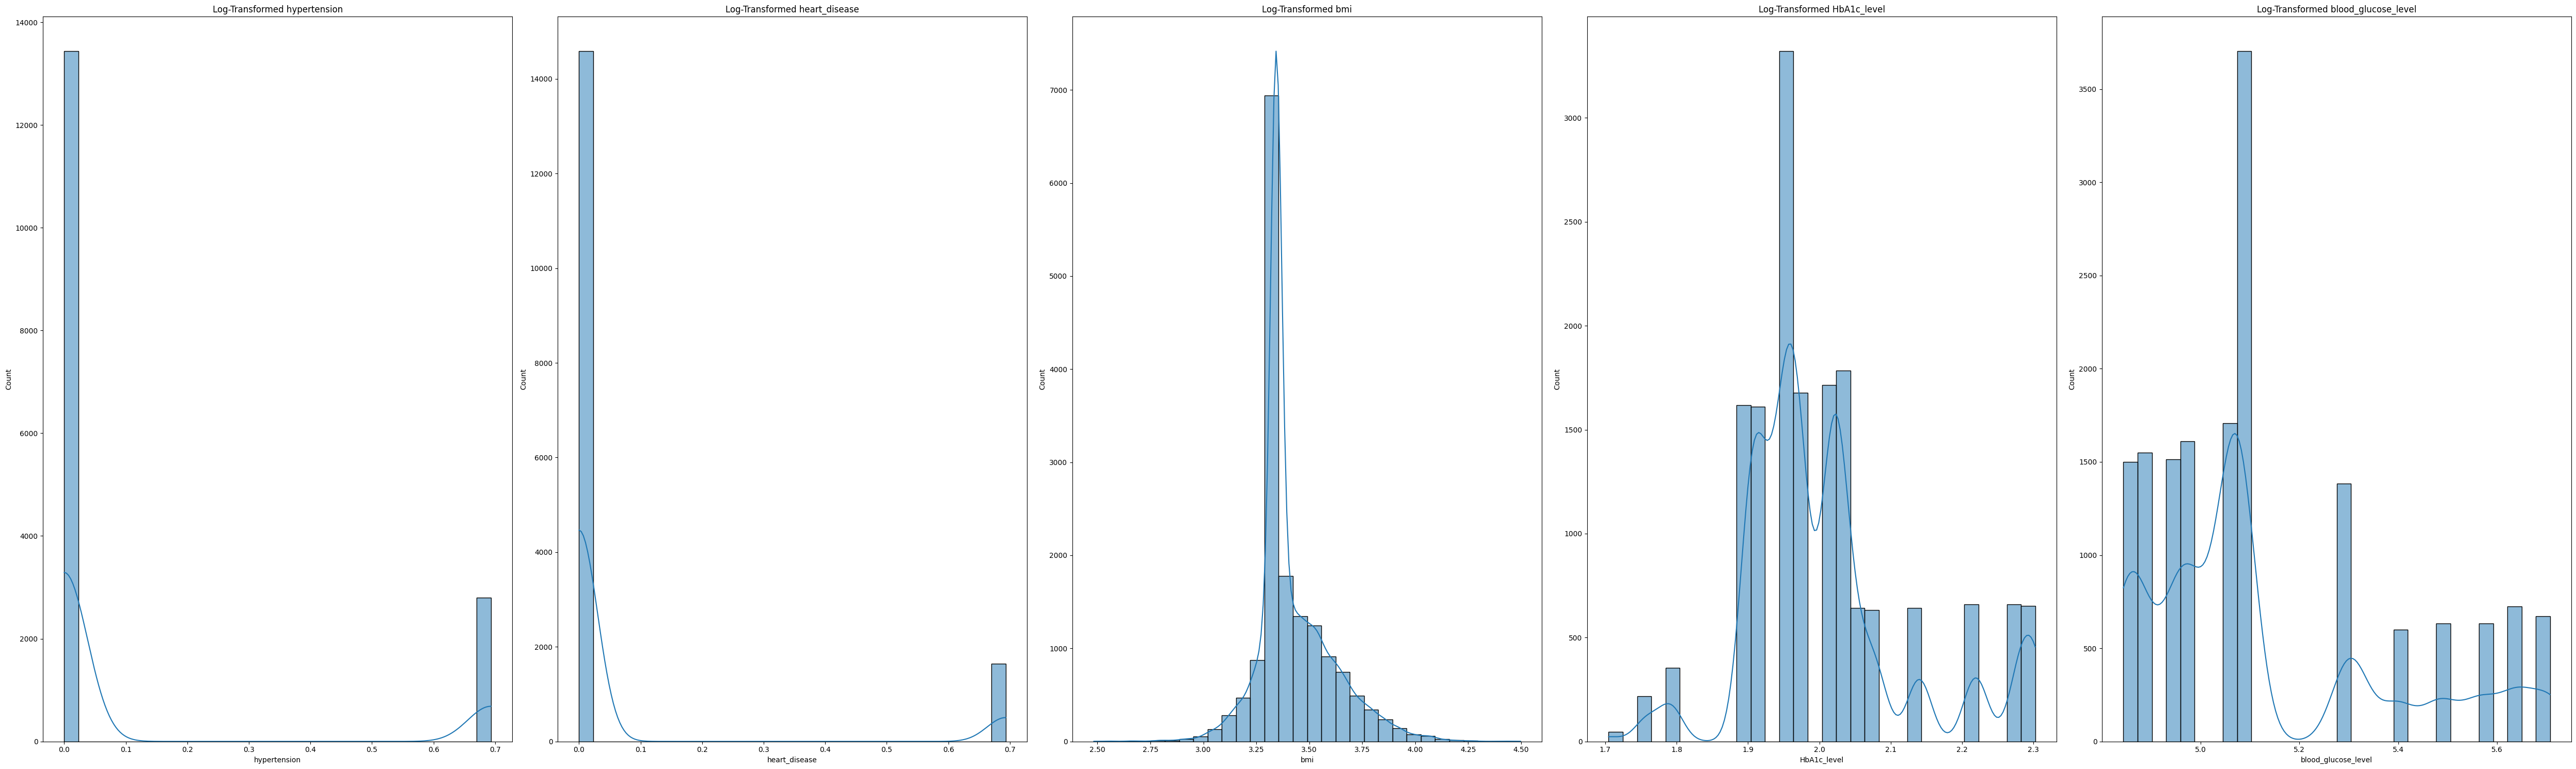

In [ ]:
#To handle skewness
log_data = np.log(df.drop(columns = ['diabetes']) + 1)  # Adding 1 to avoid log(0)
print(log_data)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()




def remove_outliers_iqr(log_data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = log_data[column].quantile(0.25)
    Q3 = log_data[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    log_data_filtered = log_data[(log_data[column] >= lower_bound) & (log_data[column] <= upper_bound)]
    return log_data_filtered
for i in ["hypertension","heart_disease", "bmi", "HbA1c_level", "blood_glucose_level"]:
    log_data = remove_outliers_iqr(log_data, i)

Purpose: Apply log transformation to reduce skewness in numerical features and visualize the resulting distributions.

Remove outliers using the Interquartile Range (IQR) method to improve model robustness.

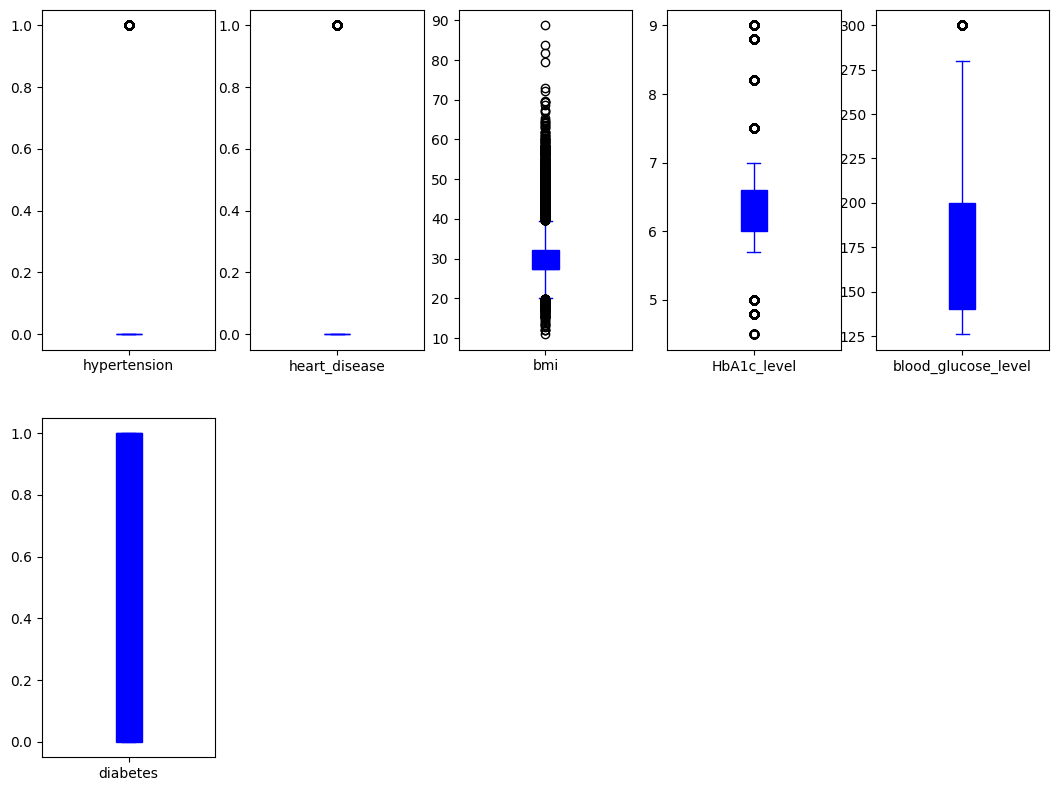

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

In [ ]:
df.shape

(16233, 6)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
independet_feature = ['hypertension', 'heart_disease', 'bmi','HbA1c_level', 'blood_glucose_level']
dependet_feature = ['diabetes']
x = df[independet_feature]
y = df[dependet_feature]

Purpose: Scale numerical features to have a mean of 0 and a standard deviation of 1 using StandardScaler for consistent model performance.

In [ ]:
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(x)

# Transform the data
X_scaled = scaler.transform(x)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12986, 5)
(3247, 5)
(12986, 1)
(3247, 1)


Purpose: Split the data into training and testing sets (80/20) to evaluate model performance.


In [ ]:
# Create an instance of the RandomForestClassifier
model_logistic = GradientBoostingClassifier()

# Fit the model using x_train and y_train
model_logistic.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
y_pred = model_logistic.predict(X_scaled)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_pred = model_logistic.predict(x_test)

# Now calculate the accuracy:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.8712657838004312


array([[1470,   80],
       [ 338, 1359]])

In [ ]:
results_df = pd.DataFrame({'y_test': y_test['diabetes'].values, 'y_pred': y_pred})
results_df

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
3242,1,0
3243,1,1
3244,1,1
3245,0,0



Generate a confusion matrix for the best-performing model to analyze its classification performance.


In [ ]:
df

,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,0,27.32,6.6,160,0
2,0,0,27.32,6.5,160,0
5,0,0,27.32,6.6,130,0
6,0,0,27.32,5.8,130,0
8,0,0,27.26,6.1,130,0
...,...,...,...,...,...,...
16995,1,1,33.55,8.2,140,1
16996,0,1,30.42,6.2,300,1
16997,0,0,34.45,6.5,280,1
16998,1,0,38.31,7.0,200,1


In [ ]:
hypertension = int(input("Enter hypertension (0 or 1): "))
heart_disease = int(input("Enter heart disease (0 or 1): "))
bmi = float(input("Enter BMI: "))
HbA1c_level = float(input("Enter HbA1c level: "))
blood_glucose_level = float(input("Enter blood glucose level: "))
user_input = [[hypertension,	heart_disease,	bmi,	HbA1c_level,	blood_glucose_level]]
std = scaler.transform(user_input)
diabetes = model_logistic.predict(std)
print('The Predicted diabetes:',diabetes)

Enter hypertension (0 or 1): 0
Enter heart disease (0 or 1): 0
Enter BMI: 27.32
Enter HbA1c level: 6.6
Enter blood glucose level: 1160
The Predicted diabetes: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Purpose: Allow users to input their health metrics and predict their diabetes status using the trained Gradient Boosting model.
